#KNN & PCA Assignment

##Assignment Questions



### Theoretical

#Q1) What is K-Nearest Neighbors (KNN) and how does it work?

Answer:
K-Nearest Neighbors (KNN) is a supervised, instance-based (lazy) learning algorithm used for classification and regression. It works by:

1. Storing the entire training dataset.

2. When a new sample comes, computing its distance from all training samples.

3. Selecting the K nearest neighbors based on the chosen distance metric (e.g., Euclidean).

4. Classification: assigns the majority class among the K neighbors.
Regression: returns the average (or weighted average) of the neighbors' target values.



---



#Q2) : What is the difference between KNN Classification and KNN Regression?

| Feature       | KNN Classification                | KNN Regression                            |
| ------------- | --------------------------------- | ----------------------------------------- |
| Output        | Categorical label                 | Continuous value                          |
| Decision Rule | Majority voting among K neighbors | Mean (or weighted mean) of K neighbors    |
| Use Case      | Spam detection, image recognition | House price prediction    stock forecasting |
                                     



---



#Q3) What is the role of the distance metric in KNN?

Answer:
The distance metric determines how "closeness" between data points is measured, directly affecting which neighbors are chosen.

Common metrics: Euclidean, Manhattan, Minkowski, Cosine similarity.

A good distance metric reflects similarity relevant to the problem — choosing the wrong one can degrade performance.



---



#Q4) What is the Curse of Dimensionality in KNN?

Answer:
As the number of features (dimensions) increases:

Distances between points become less meaningful (all points become “equidistant”).

KNN performance degrades since it relies on meaningful distances.

It leads to increased computational cost and overfitting.
This problem is known as the curse of dimensionality.




---



#Q5 - How can we choose the best value of K in KNN?

Answer:

Use Cross-Validation to test multiple K values and pick the one with highest accuracy or lowest error.

Typically, odd K is used for binary classification to avoid ties.

Small K → high variance (overfitting), Large K → high bias (underfitting).

A practical approach: try K ≈ √n (where n = number of samples) as a starting point.



---



#Q6) What are KD Tree and Ball Tree in KNN?

Answer:
They are data structures used to speed up nearest neighbor searches:

KD Tree (k-dimensional tree): A binary tree that splits data along feature dimensions. Efficient for low-dimensional data.

Ball Tree: Organizes points into nested hyperspheres. Works better in high-dimensional or non-uniform data spaces.



---



#Q7) When should you use KD Tree vs. Ball Tree?

| Scenario          | KD Tree                | Ball Tree                         |
| ----------------- | ---------------------- | --------------------------------- |
| Dimensions        | Low (≤ 20)             | High (> 20)                       |
| Data distribution | Uniform / structured   | Non-uniform / scattered           |
| Performance       | Faster on low-dim data | Better on high-dim or sparse data |




---



#Q8) What are the disadvantages of KNN?

Answer:

Slow prediction: Must compute distance to all training points.

High memory usage: Stores entire training data.

Sensitive to irrelevant features and noise.

Poor performance on high-dimensional data (curse of dimensionality).

No model interpretability since it’s non-parametric.



---



#Q9) How does feature scaling affect KNN?

Answer:
KNN relies on distance metrics, so features with larger scales dominate the distance calculation.

Without scaling: model may become biased toward high-magnitude features.

With scaling (e.g., StandardScaler or MinMaxScaler): all features contribute equally, improving performance and accuracy.



---



#Q10) What is PCA (Principal Component Analysis)?

Answer:
PCA is an unsupervised dimensionality reduction technique that transforms high-dimensional data into a smaller set of new variables called principal components, which capture the maximum variance in the data while reducing redundancy.



---



#Q11) How does PCA work?

Answer:

Standardize the dataset.

Compute the covariance matrix.

Calculate eigenvalues and eigenvectors.

Sort eigenvectors by eigenvalues (variance explained).

Project data onto the top k eigenvectors to form the reduced dataset.



---



#Q12) What is the geometric intuition behind PCA?

Answer:
PCA rotates the coordinate system of the data to align with directions of maximum variance. The first principal component is the direction where data varies the most, the second is orthogonal to the first with next highest variance, and so on — effectively finding a new orthogonal basis that captures the data’s spread with fewer dimensions.



---



#Q13) What is the difference between Feature Selection and Feature Extraction?

| Feature Selection                     | Feature Extraction (e.g., PCA)                               |
| ------------------------------------- | ------------------------------------------------------------ |
| Chooses a subset of original features | Creates new features from original ones                      |
| Original meaning retained             | Original meaning lost (new features are linear combinations) |
| Example: SelectKBest, Chi-Square      | Example: PCA, LDA                                            |




---



#Q14) What are Eigenvalues and Eigenvectors in PCA?

Answer:

Eigenvectors: Directions of the new feature space (principal components).

Eigenvalues: Amount of variance captured by each eigenvector.

Higher eigenvalues → more significant components.
Together, they define the axes of the transformed feature space and how much variance each axis explains.



---



#Q15) How do you decide the number of components to keep in PCA?

Answer:

Use explained variance ratio: choose the smallest number of components that explain ~90–95% of total variance.

Use scree plot (elbow method) to visually find a point of diminishing returns.

Use cross-validation to check downstream model performance.



---



#Q16) Can PCA be used for classification?

Answer:
PCA itself is unsupervised and doesn’t classify. However, it is commonly used before classification to reduce dimensionality, speed up training, remove noise, and improve model performance. The transformed data can then be used by classifiers like KNN, SVM, etc.



---



#Q17) What are the limitations of PCA?

Answer:

Loss of interpretability: principal components are linear combinations, not original features.

Linear method: cannot capture non-linear relationships.

Sensitive to scaling: features must be standardized.

Sensitive to outliers: which can distort principal components.

Unsupervised: ignores class labels, so components might not be optimal for classification tasks.



---



#Q18) How do KNN and PCA complement each other?

Answer:

PCA reduces dimensionality and noise → distances become more meaningful.

This helps KNN perform better by improving computational efficiency and accuracy, especially in high-dimensional spaces.

Using PCA before KNN often reduces overfitting and speeds up distance calculations.



---



#Q19) How does KNN handle missing values in a dataset?

Answer:
KNN does not handle missing values directly — they must be imputed first.
Common approaches:

Imputation before KNN: mean/median for numeric, mode for categorical.

KNN Imputer: use nearest neighbors to estimate missing values based on similar samples.
If missing values remain, KNN cannot compute distances properly.



---



#Q20) What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

| Feature            | PCA                                      | LDA                                       |
| ------------------ | ---------------------------------------- | ----------------------------------------- |
| Type               | Unsupervised                             | Supervised                                |
| Goal               | Maximize variance                        | Maximize class separation                 |
| Uses class labels? | No                                       | Yes                                       |
| Output components  | Based on variance directions             | Based on class discriminant directions    |
| Use case           | Dimensionality reduction & visualization | Classification & dimensionality reduction |


### Practical

##Q21) Train a KNN Classifier on the Iris dataset and print model accuracy.



In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


##Q22) Train a KNN Regressor on a synthetic dataset and evaluate using MSE.

In [2]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic regression data
X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_reg.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 1433.3994545112985


##Q23) Train a KNN Classifier using different distance metrics and compare accuracy.


In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

metrics_list = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics_list:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy using {metric} distance:", accuracy_score(y_test, y_pred))

Accuracy using euclidean distance: 1.0
Accuracy using manhattan distance: 1.0
Accuracy using minkowski distance: 1.0


##Q24) Train a KNN Classifier with different values of K and visualize decision boundaries.

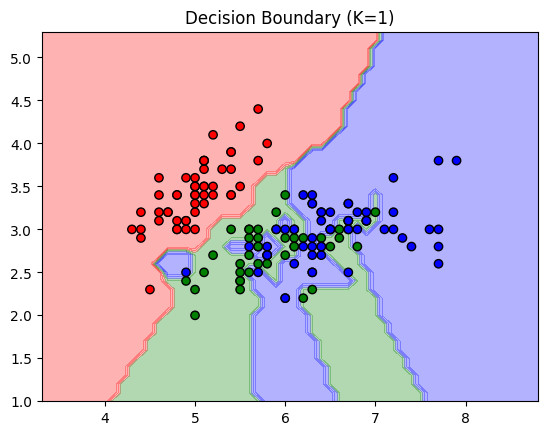

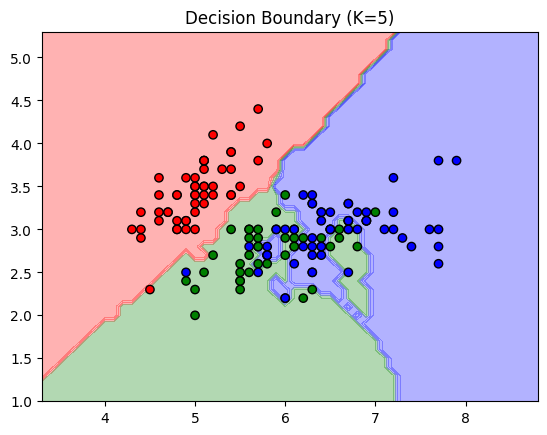

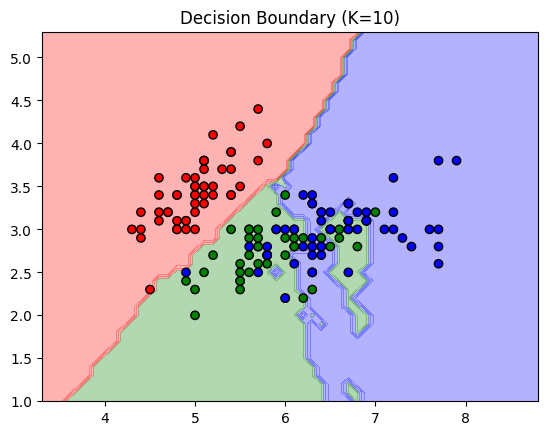

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Use only two features for visualization
X_vis = iris.data[:, :2]
y_vis = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Decision boundary visualization
for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    # Create meshgrid
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red','green','blue']))
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k', cmap=ListedColormap(['red','green','blue']))
    plt.title(f"Decision Boundary (K={k})")
    plt.show()

##Q25) Apply Feature Scaling before training a KNN model and compare results.

In [9]:
from sklearn.preprocessing import StandardScaler

# Without scaling
model_no_scale = KNeighborsClassifier(n_neighbors=5)
model_no_scale.fit(X_train, y_train)
acc_no_scale = accuracy_score(y_test, model_no_scale.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = KNeighborsClassifier(n_neighbors=5)
model_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print("Accuracy without scaling:", acc_no_scale)
print("Accuracy with scaling:", acc_scaled)

Accuracy without scaling: 0.8
Accuracy with scaling: 0.8333333333333334


##Q26) Train a PCA model on synthetic data and print explained variance ratio.

In [10]:
from sklearn.decomposition import PCA

# Generate synthetic data
X, _ = make_regression(n_samples=200, n_features=5, noise=0.3, random_state=42)

# Apply PCA
pca = PCA(n_components=5)
pca.fit(X)

# Print explained variance
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio for each component:
[0.24505332 0.20890343 0.198169   0.18640823 0.16146602]


##Q27) Apply PCA before training a KNN Classifier and compare accuracy.

In [11]:
# Without PCA
model_no_pca = KNeighborsClassifier(n_neighbors=5)
model_no_pca.fit(X_train_scaled, y_train)
acc_no_pca = accuracy_score(y_test, model_no_pca.predict(X_test_scaled))

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca = KNeighborsClassifier(n_neighbors=5)
model_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, model_pca.predict(X_test_pca))

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA:", acc_pca)

Accuracy without PCA: 0.8333333333333334
Accuracy with PCA: 0.7666666666666667


##Q28) Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy: 0.75


##Q29) Train a KNN Classifier and check the number of misclassified samples.

In [13]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

misclassified = (y_pred != y_test).sum()
print("Number of misclassified samples:", misclassified)

Number of misclassified samples: 5


##Q30) Train a PCA model and visualize the cumulative explained variance.

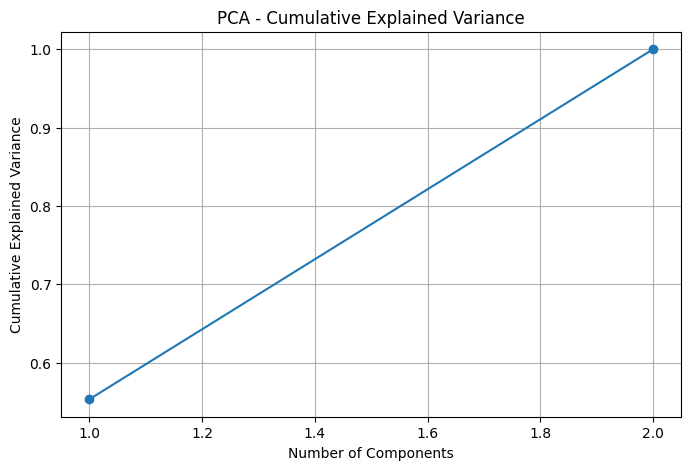

In [14]:
import numpy as np

pca = PCA().fit(X_train_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

##Q31) Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and split dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compare weights: uniform vs distance
for weight in ['uniform', 'distance']:
    model = KNeighborsClassifier(n_neighbors=5, weights=weight)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with weights='{weight}':", accuracy_score(y_test, y_pred))

Accuracy with weights='uniform': 1.0
Accuracy with weights='distance': 1.0


##Q32) Train a KNN Regressor and analyze the effect of different K values on performance.

In [16]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=4, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in [1, 3, 5, 10, 20]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"K={k}, MSE:", mean_squared_error(y_test, y_pred))

K=1, MSE: 2307.741638738547
K=3, MSE: 1988.224134468733
K=5, MSE: 1631.6251243257198
K=10, MSE: 1954.4857062287533
K=20, MSE: 2525.6670706999585


##Q33) Implement KNN Imputation for handling missing values.

In [17]:
import numpy as np
from sklearn.impute import KNNImputer

# Create data with missing values
X = np.array([[1, 2, np.nan],
              [3, np.nan, 1],
              [5, 6, 2],
              [np.nan, 8, 3]])

imputer = KNNImputer(n_neighbors=2)
X_imputed = imputer.fit_transform(X)
print("Imputed Data:\n", X_imputed)

Imputed Data:
 [[1.  2.  1.5]
 [3.  4.  1. ]
 [5.  6.  2. ]
 [4.  8.  3. ]]


##Q34) Train a PCA model and visualize data projection onto the first two components.

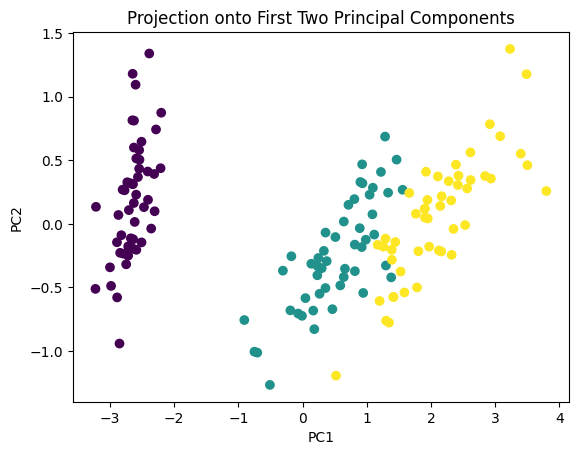

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection onto First Two Principal Components")
plt.show()

##Q35) Train a KNN Classifier using KD Tree and Ball Tree and compare performance.

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and split dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Feature scaling (based on previous cells)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for algo in ['kd_tree', 'ball_tree']:
    model = KNeighborsClassifier(algorithm=algo)
    model.fit(X_train_scaled, y_train) # Use scaled data for training
    y_pred = model.predict(X_test_scaled) # Use scaled data for prediction
    print(f"Algorithm: {algo}, Accuracy:", accuracy_score(y_test, y_pred))

Algorithm: kd_tree, Accuracy: 1.0
Algorithm: ball_tree, Accuracy: 1.0


##Q36) Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

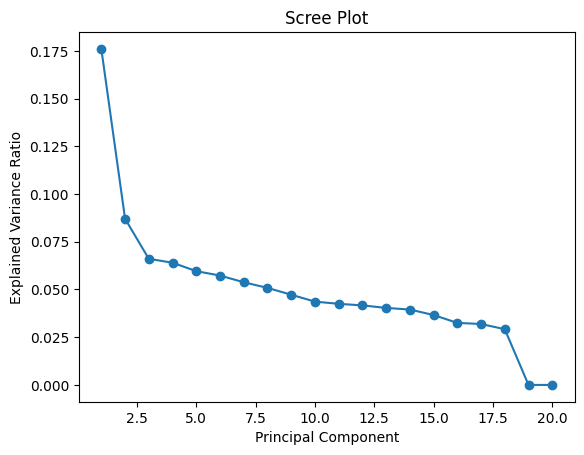

In [22]:
from sklearn.datasets import make_classification

X_high, _ = make_classification(n_samples=300, n_features=20, random_state=42)
pca = PCA().fit(X_high)

plt.plot(range(1, 21), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

##Q37) Train a KNN Classifier and evaluate Precision, Recall, F1-score.

In [23]:
from sklearn.metrics import classification_report

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##Q38) Train a PCA model and analyze effect of different components on accuracy.

In [24]:
for n in [1, 2, 3, 4]:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_pca, y_train)
    print(f"Accuracy with {n} components:", accuracy_score(y_test, model.predict(X_test_pca)))

Accuracy with 1 components: 1.0
Accuracy with 2 components: 1.0
Accuracy with 3 components: 1.0
Accuracy with 4 components: 1.0


##Q39) Train a KNN Classifier with different leaf_size values and compare accuracy.

In [25]:
for leaf in [10, 20, 30, 50]:
    model = KNeighborsClassifier(leaf_size=leaf)
    model.fit(X_train, y_train)
    print(f"Leaf size={leaf}, Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Leaf size=10, Accuracy: 1.0
Leaf size=20, Accuracy: 1.0
Leaf size=30, Accuracy: 1.0
Leaf size=50, Accuracy: 1.0


##Q40) Visualize how data points are transformed before and after PCA.

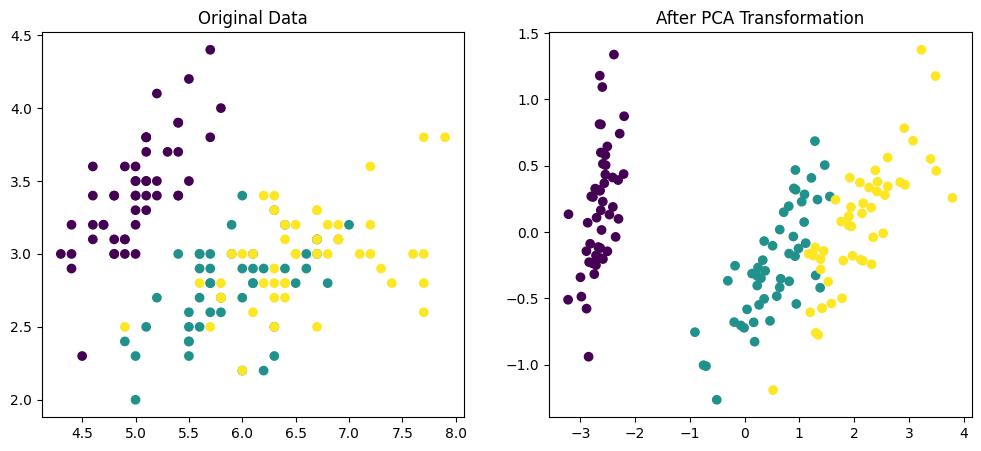

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.title("Original Data")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title("After PCA Transformation")
plt.show()

##Q41) Train a KNN Classifier on the Wine dataset and print classification report.

In [27]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



##Q42) KNN Regressor – analyze different distance metrics on prediction error.

In [28]:
for metric in ['euclidean', 'manhattan', 'minkowski']:
    model = KNeighborsRegressor(metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Metric: {metric}, MSE:", mean_squared_error(y_test, y_pred))

Metric: euclidean, MSE: 0.29
Metric: manhattan, MSE: 0.21666666666666667
Metric: minkowski, MSE: 0.29


##Q43) Train a KNN Classifier and evaluate using ROC-AUC score.

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Load and split dataset (using Iris dataset for classification)
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Binarize the target variable for ROC-AUC
y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)

# Calculate and print the ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_bin, y_score, average='macro'))

ROC-AUC Score: 1.0


##Q44) Train a PCA model and visualize variance captured by each component.

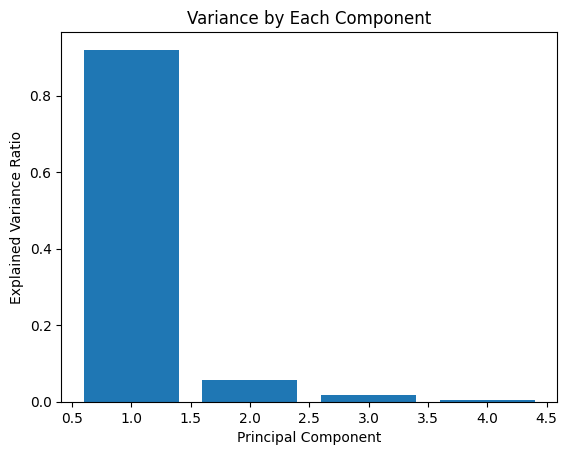

In [31]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance by Each Component")
plt.show()

##Q45) Perform Feature Selection before training KNN.

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Accuracy after feature selection:", accuracy_score(y_test, model.predict(X_test)))

Accuracy after feature selection: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


##Q46) Train a PCA model and visualize reconstruction error.

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error = np.mean((X - X_reconstructed)**2)
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 0.02534107393239825


##Q47) Train a KNN Classifier and visualize decision boundary.

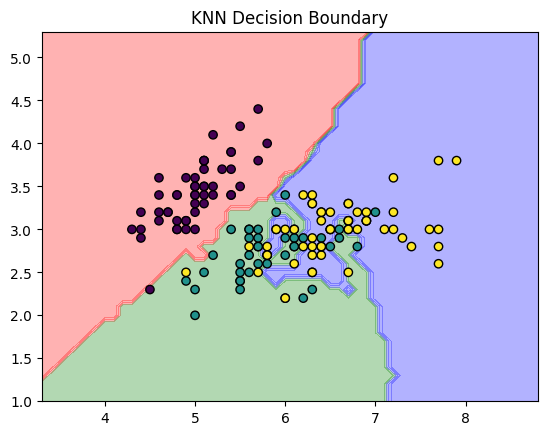

In [34]:
from matplotlib.colors import ListedColormap

X_plot = X[:, :2]
y_plot = y

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_plot, y_plot)

x_min, x_max = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
y_min, y_max = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red','green','blue']))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolors='k')
plt.title("KNN Decision Boundary")
plt.show()

##Q48) Analyze the effect of different PCA components on variance.

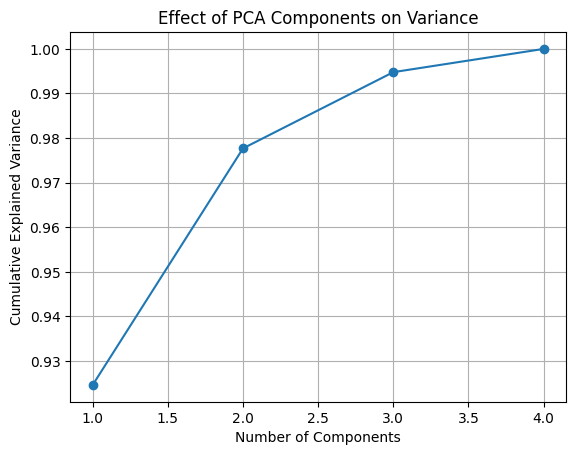

In [35]:
components = range(1, X.shape[1]+1)
variances = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X)
    variances.append(np.sum(pca.explained_variance_ratio_))

plt.plot(components, variances, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Effect of PCA Components on Variance")
plt.grid(True)
plt.show()